In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
df = pd.read_csv(r'dataset_sdn.csv')

In [3]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [4]:
df.shape

(104345, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
df.label.unique()

array([0, 1], dtype=int64)

In [7]:
df.label.value_counts()


0    63561
1    40784
Name: label, dtype: int64

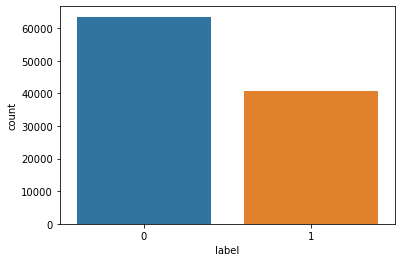

In [8]:
label_dict = dict(df.label.value_counts())
sns.countplot(df.label)

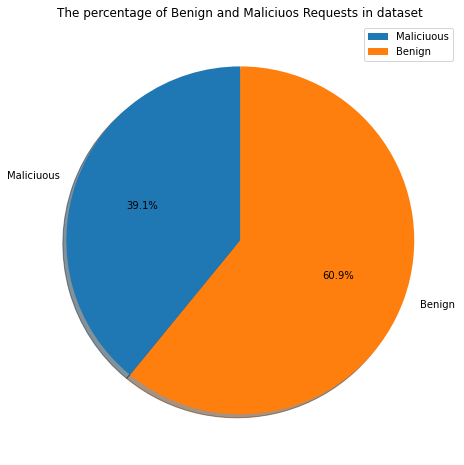

In [110]:
labels = ["Maliciuous",'Benign']
sizes = [dict(df.label.value_counts())[1], dict(df.label.value_counts())[0]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.savefig("DDos_dataset.jpg")
plt.show()


In [10]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

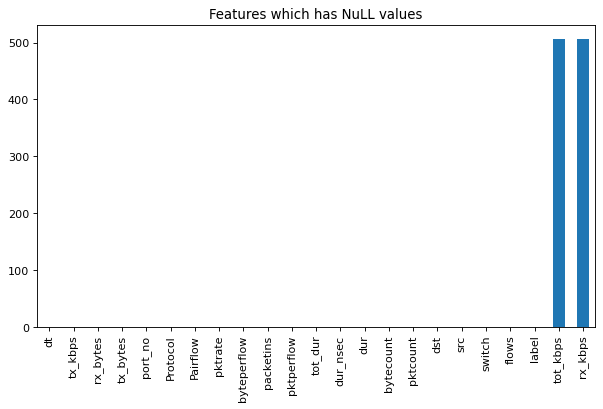

In [11]:
figure(figsize=(9, 5), dpi=80)
df[df.columns[df.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [12]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
object_df = df.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [14]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

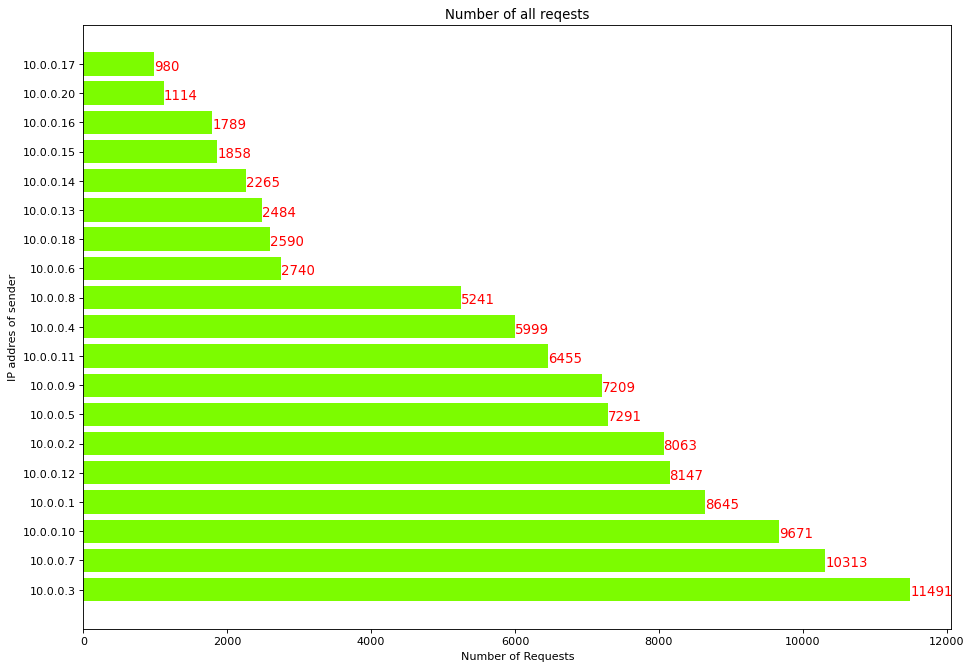

In [15]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(14, 10), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 12)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

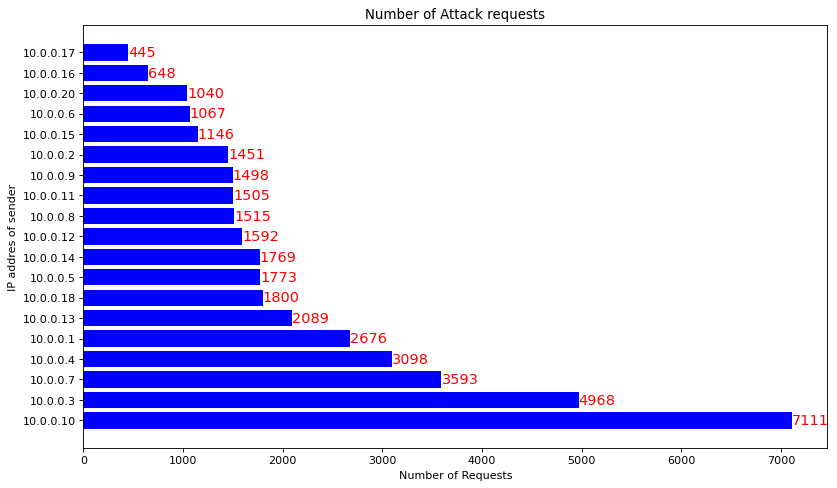

In [16]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

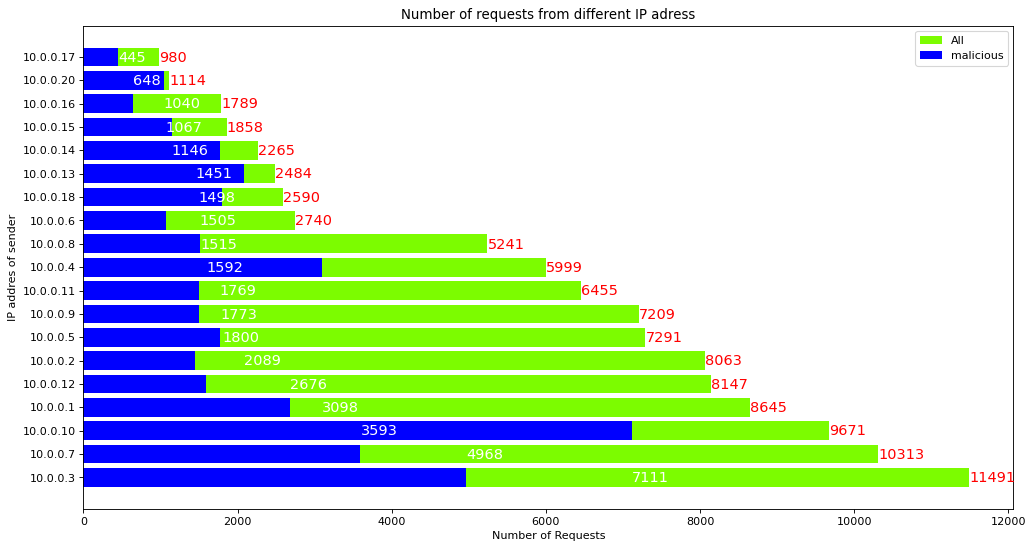

In [17]:
figure(figsize=(15, 8), dpi=80)
plt.barh(list(dict(df.src.value_counts()).keys()), dict(df.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(df[df.label == 1].src.value_counts()).keys()), dict(df[df.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(df.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(df[df.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

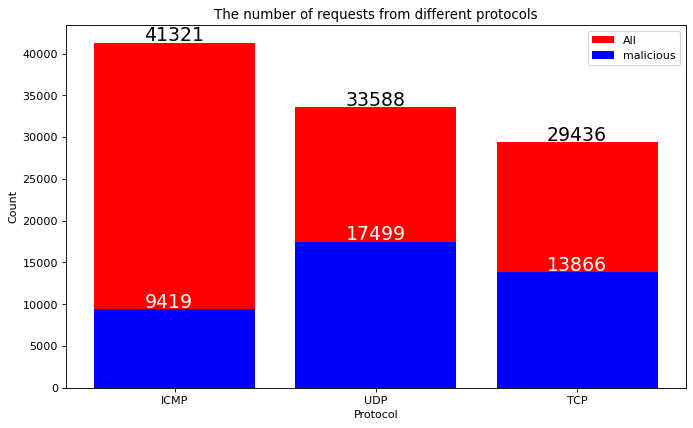

In [106]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(df.Protocol.value_counts()).keys()), dict(df.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(df[df.label == 1].Protocol.value_counts()).keys()), dict(df[df.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')
plt.savefig("requests_from_different_protocols.jpg")

In [19]:
new_df = df.copy()

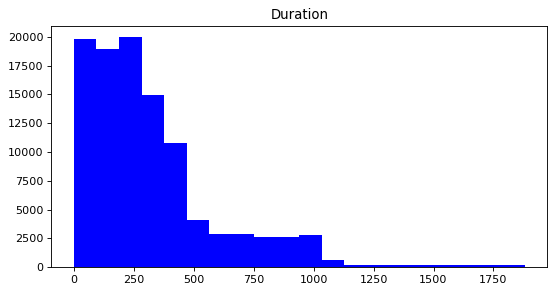

In [20]:
figure(figsize=(8, 4), dpi=80)
plt.hist(new_df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

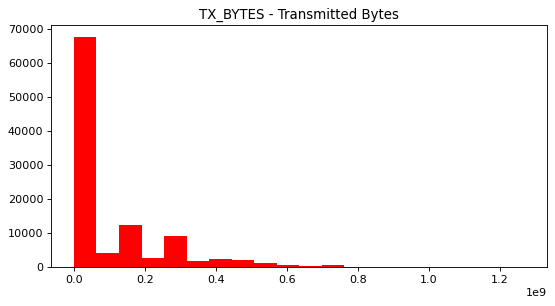

In [21]:
figure(figsize=(8, 4), dpi=80)
plt.hist(new_df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

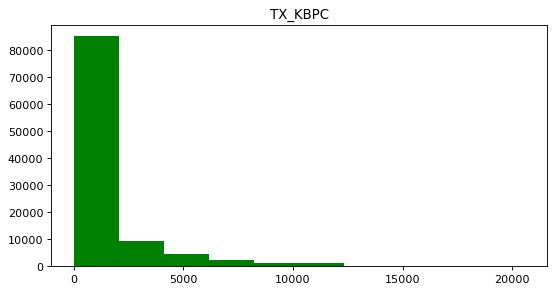

In [22]:
figure(figsize=(8, 4), dpi=80)
plt.hist(new_df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

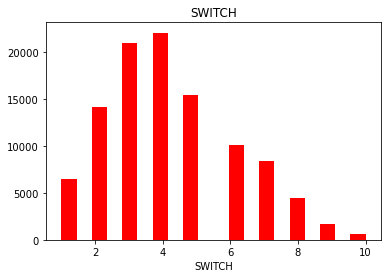

In [23]:
plt.hist(new_df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

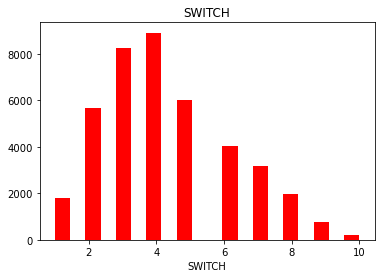

In [24]:
plt.hist(new_df[new_df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [25]:
df.drop(['dt','src', 'dst'],axis=1,inplace=True)
df.head()

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [26]:
df.Protocol.unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

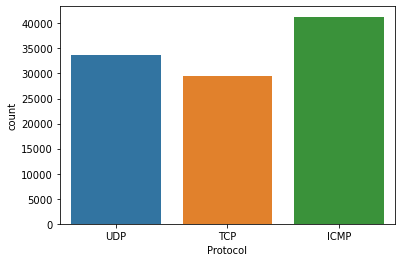

In [105]:
Proto_dict = dict(df.Protocol.value_counts())
sns.countplot(df.Protocol)
plt.savefig("dataset_traffic_count.jpg")

In [28]:
# proto = ["UDP",'TCP','ICMP']
# sizes = [dict(new_df.Protocol.value_counts())[0], dict(new_df.Protocol.value_counts())[1],dict(new_df.Protocol.value_counts())[2]]
# plt.figure(figsize = (13,8))
# plt.pie(sizes, labels=proto, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# plt.legend(["UDP",'TCP','ICMP'])
# plt.title('The percentage of Benign and Maliciuos Requests in dataset')
# plt.show()

In [29]:
new_df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [30]:
lable_encoder=LabelEncoder()

In [31]:
new_df["Protocol"]=lable_encoder.fit_transform(new_df["Protocol"])

In [32]:
new_df.Protocol.unique()

array([2, 1, 0])

In [33]:
new_df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [34]:
new_df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,...,104345.000000,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,...,212.210676,0.600987,0.925890,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,...,246.855123,0.489698,0.844045,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,...,-4365.000000,0.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,...,0.000000,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,...,276.000000,1.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,...,333.000000,1.000000,2.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,...,639.000000,1.000000,2.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [35]:
new_df=new_df.interpolate()

In [36]:
new_df.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [50]:
X=new_df.drop(columns=['label','src','dst','dt'])
Y=new_df['label']

In [51]:
X

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [52]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X))
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.5,0.026344,0.549395,-0.529825,0.635394,-0.527972,-0.50,-0.195869,0.523628,1.426813,0.525526,-1.0,0.5,0.5,1.030036,-0.092962,0.000000,0.000000,-0.001042
1,-1.5,0.889124,1.684951,0.101754,0.673774,0.101399,-0.75,-0.195869,0.523228,1.426375,0.525526,-1.0,0.5,1.0,-0.031082,-0.092965,0.000000,0.000000,-0.001042
2,-1.5,0.505437,1.179958,-0.178947,0.695096,-0.178322,-0.50,-0.195869,0.523528,1.426703,0.525526,-1.0,0.5,-0.5,-0.031082,-0.092981,0.000000,0.000000,-0.001042
3,-1.5,0.505437,1.179958,-0.178947,0.695096,-0.178322,-0.50,-0.195869,0.523528,1.426703,0.525526,-1.0,0.5,0.0,-0.031083,-0.092979,0.000000,0.000000,-0.001042
4,-1.5,0.505437,1.179958,-0.178947,0.695096,-0.178322,-0.50,-0.195869,0.523528,1.426703,0.525526,-1.0,0.5,0.5,-0.031085,-0.092964,0.000000,0.000000,-0.001042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,-0.5,-0.454835,-0.084917,-0.596491,0.904051,-0.594958,0.00,-0.546113,-0.828594,-0.056484,-0.828829,-1.0,-0.5,-0.5,-0.030998,-0.092901,0.003984,0.001672,-0.000521
104341,-0.5,-0.454835,-0.084917,-0.596491,0.904051,-0.594958,0.00,-0.546113,-0.828594,-0.056484,-0.828829,-1.0,-0.5,0.5,-0.030999,-0.092887,0.003984,0.001672,-0.000521
104342,-0.5,-0.455345,-0.084978,-0.771930,0.825160,-0.769913,0.00,-0.546113,-0.828494,-0.056474,-0.825826,-1.0,-0.5,0.0,-0.031085,-0.092963,0.000000,0.000000,-0.001042
104343,-0.5,-0.455345,-0.084978,-0.771930,0.825160,-0.769913,0.00,-0.546113,-0.828494,-0.056474,-0.825826,-1.0,-0.5,-0.5,-0.030998,-0.092901,0.003984,0.001672,-0.000521


In [53]:
X_scaled.shape

(104345, 19)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [55]:
X_new=X.drop(columns=['Protocol'])
Y_new=X['Protocol']

In [56]:
X_new_scaled=pd.DataFrame(scaler.fit_transform(X_new))

In [57]:
x_ntrain, x_ntest, y_ntrain, y_ntest = train_test_split(X_new_scaled, Y_new, test_size=0.2, random_state=42)


In [58]:
def svm():
    classifier=SVC(kernel="linear")
    classifier.fit(x_train,y_train)
    y_pred= classifier.predict(x_test)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #y_pred = model_selection.cross_val_score(classifier, x_train, y_train, cv=kfold, scoring=scoring)
    score=accuracy_score(y_test,y_pred)
    print("\nSupport Vector Machine\nAccuracy Score: ",+score)
    #plt.scatter(y_test,y_pred)
    #plt.xlabel('True Values ')
    #plt.ylabel('Predictions ')
    #plt.show()
    return score  

In [59]:
def random():
    model = RandomForestClassifier(n_estimators=50)
    model1= BaggingClassifier(base_estimator=model, n_estimators=70, random_state=41)
    results_model = model1.fit(x_train,y_train)
    y_pred1= results_model.predict(x_test)
    score=accuracy_score(y_test,y_pred1)
    print("\nRandom Forest\nAccuracy Score: ",+score)
    
    return score    

In [60]:
def knn():
    model= KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print("\nKNeighbour\nAccuracy Score: ",+score)
    
    return score

In [61]:
models=[random,svm,knn]
names=['random','svm','knn']

In [62]:
# name=[]
# results=[]
# m=0
# for model in models:
#     print("\n")
#     r=models[m]()
#     results.append(r)
#     name.append(m)
    
#     print('\n')
    
#     m=m+1

In [63]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout

In [64]:
model = Sequential()
model.add(Dense(32, input_shape=(19,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 512)               16896     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [66]:
es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5,
    restore_best_weights=True
)

In [67]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

In [83]:
history=model.fit(x_train, 
          y_train, 
          epochs=30,
          batch_size=250, 
          verbose=1, 
          validation_split=0.2,
          callbacks=[es])

Epoch 1/30
268/268 [==============================] - 2s 7ms/step - loss: 0.0296 - accuracy: 0.9877 - val_loss: 0.0229 - val_accuracy: 0.9903
Epoch 2/30
268/268 [==============================] - 2s 7ms/step - loss: 0.0290 - accuracy: 0.9878 - val_loss: 0.0232 - val_accuracy: 0.9901
Epoch 3/30
268/268 [==============================] - 2s 7ms/step - loss: 0.0259 - accuracy: 0.9891 - val_loss: 0.0210 - val_accuracy: 0.9902
Epoch 4/30
268/268 [==============================] - 2s 7ms/step - loss: 0.0249 - accuracy: 0.9898 - val_loss: 0.0209 - val_accuracy: 0.9901
Epoch 5/30
268/268 [==============================] - 2s 8ms/step - loss: 0.0271 - accuracy: 0.9886 - val_loss: 0.0213 - val_accuracy: 0.9908
Epoch 6/30
268/268 [==============================] - 3s 12ms/step - loss: 0.0256 - accuracy: 0.9888 - val_loss: 0.0188 - val_accuracy: 0.9920
Epoch 7/30
268/268 [==============================] - 3s 12ms/step - loss: 0.0243 - accuracy: 0.9899 - val_loss: 0.0200 - val_accuracy: 0.9923
Epoc

In [68]:
from keras.utils import plot_model
import pydot
import graphviz


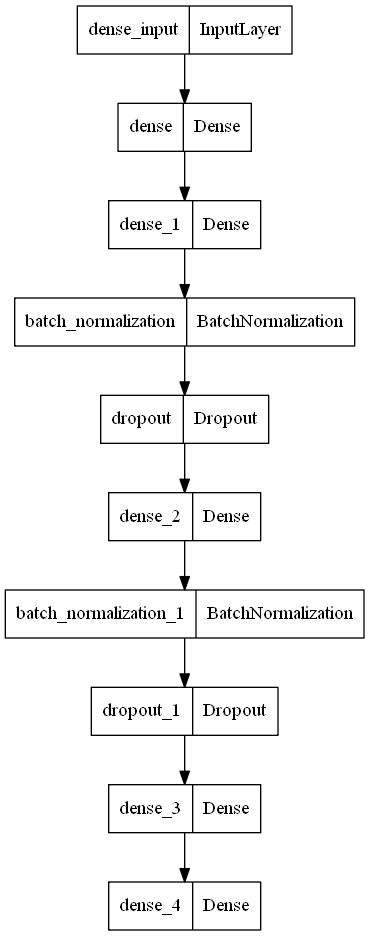

In [69]:
plot_model(model, to_file='simple_model.png')

In [71]:
#from tensorflow.keras.layers import GroupNormalization

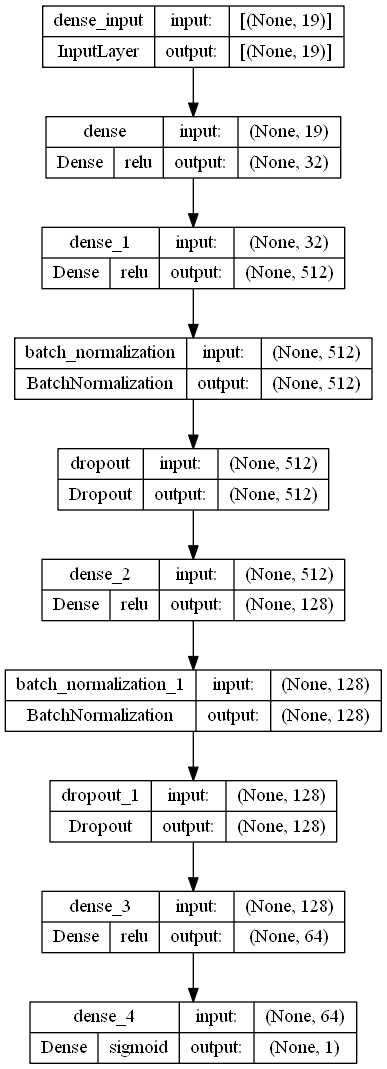

In [80]:
plot_model(model,show_shapes=True,show_layer_activations=True,to_file='DDoS_model.png')

In [114]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [115]:
#history.history

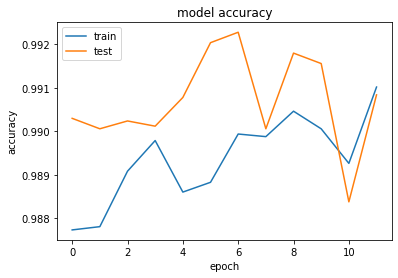

<Figure size 432x288 with 0 Axes>

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("model_accuracy2.jpg")

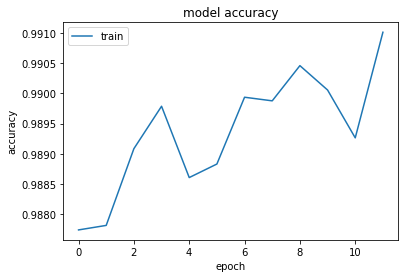

<Figure size 432x288 with 0 Axes>

In [103]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()
plt.savefig("model_accuracy.jpg")

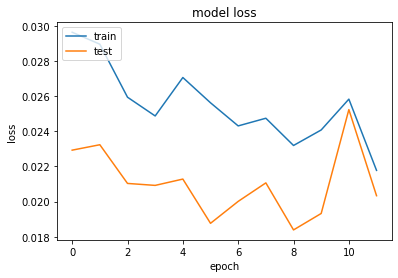

In [117]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

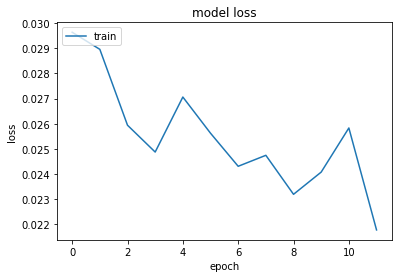

<Figure size 432x288 with 0 Axes>

In [102]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()
plt.savefig("model_loss.jpg")

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [89]:
y_pred=model.predict(x_test)

653/653 [==============================] - 1s 1ms/step


In [95]:
y_pred


array([[1.4859219e-09],
       [7.7049237e-01],
       [1.9012918e-09],
       ...,
       [8.8243816e-08],
       [4.4210440e-01],
       [1.2365955e-08]], dtype=float32)

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


preds = np.round(model.predict(x_test),0)

cm=confusion_matrix(y_test, preds)
print (cm)

653/653 [==============================] - 1s 1ms/step
[[12565   157]
 [   40  8107]]


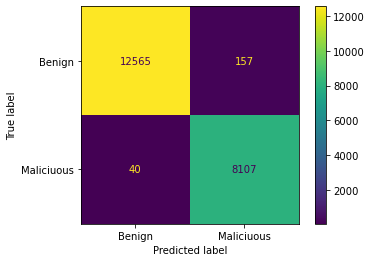

In [101]:
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Maliciuous'])

cm_dis.plot()
plt.savefig("confusion.jpg")

In [72]:
# nmodel = Sequential()
# nmodel.add(Dense(32, input_shape=(18,), activation='relu'))
# nmodel.add(Dense(512, activation='relu'))
# nmodel.add(GroupNormalization())
# nmodel.add(Dropout(0.5))
# nmodel.add(Dense(128, activation='relu'))
# nmodel.add(GroupNormalization())
# nmodel.add(Dropout(0.5))
# nmodel.add(Dense(64, activation='relu'))
# nmodel.add(Dense(1, activation='sigmoid'))

In [73]:
# nmodel.summary()

In [74]:
# es = EarlyStopping(
#     monitor='val_accuracy', 
#     mode='max',
#     patience=5,
#     restore_best_weights=True
# )

In [75]:
# nmodel.compile(loss='categorical_crossentropy', 
#               optimizer='Adam', 
#               metrics=['accuracy'])

In [76]:
# nmodel.fit(x_ntrain, 
#           y_ntrain, 
#           epochs=30,
#           batch_size=250, 
#           verbose=1, 
#           validation_split=0.2,
#           callbacks=[es])